## Creating Product Segments using Clustering
### Business Problem:
A company would like to enter the Beer market with a new beer brand. Before, it decides the kind of beer it will launch, it must understand what kind of products are already available in the market and what kind of segments the products address.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
beer_df = pd.read_csv('beer.csv')
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [7]:
beer_df.describe()

,calories,sodium,alcohol,cost
count,20.000000,20.000000,20.000000,20.000000
mean,132.550000,14.950000,4.240000,0.494500
std,30.283702,6.581273,1.087924,0.144858
min,68.000000,6.000000,0.900000,0.280000
25%,110.250000,9.500000,4.175000,0.427500
50%,144.000000,15.000000,4.600000,0.435000
75%,150.250000,19.000000,4.900000,0.485000
max,175.000000,27.000000,5.500000,0.790000


In [8]:
beer_df.isnull().any()

name        False
calories    False
sodium      False
alcohol     False
cost        False
dtype: bool

In [9]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      20 non-null     object 
 1   calories  20 non-null     int64  
 2   sodium    20 non-null     int64  
 3   alcohol   20 non-null     float64
 4   cost      20 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 928.0+ bytes


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [13]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(beer_df[['calories','sodium','alcohol','cost']])

In [14]:
scaled_df

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

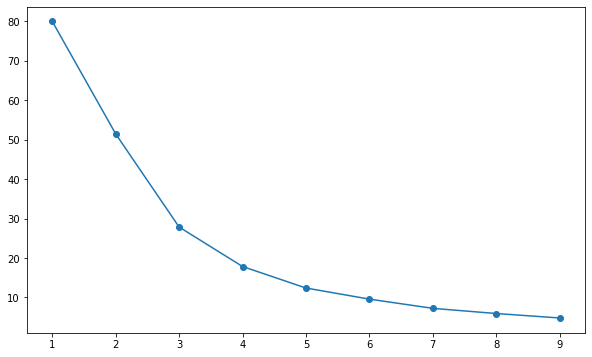

In [20]:
cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_df)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(10,6))
plt.plot(cluster_range, cluster_errors,marker = "o")

### The optimal number is chosen here as 3, as adding adding another cluster does not change the variance explained significantly

## Creating Clusters

In [23]:
k = 3
clusters = KMeans(k,random_state = 42)
clusters.fit(scaled_df)
beer_df['cluster_id'] = clusters.labels_

In [24]:
beer_df

,name,calories,sodium,alcohol,cost,cluster_id
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0


In [33]:
beer_df.groupby('cluster_id')['calories','sodium','alcohol','cost'].agg({'mean','count'}).reset_index()

<ipython-input-33-cab72f2585b5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  beer_df.groupby('cluster_id')['calories','sodium','alcohol','cost'].agg({'mean','count'}).reset_index()


cluster_id calories        sodium       alcohol          cost      
                 mean count    mean count    mean count    mean count
0          0  105.375     8  10.875     8  3.3250     8  0.4475     8
1          1  148.375     8  21.125     8  4.7875     8  0.4075     8
2          2  155.250     4  10.750     4  4.9750     4  0.7625     4

In [26]:
beer_df[beer_df['cluster_id']==0]

,name,calories,sodium,alcohol,cost,cluster_id
2,Lowenbrau,157,15,0.9,0.48,0
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0
11,Coors_Light,102,15,4.1,0.46,0
12,Michelob_Light,135,11,4.2,0.50,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
19,Schlitz_Light,97,7,4.2,0.47,0


## In cluster 0 -
All the light beers with low calories and sodium content are clustered into one group. This must be adderessing the customer segment who wants to drink but are also calorie conscious

In [30]:
beer_df[beer_df['cluster_id']==1]

,name,calories,sodium,alcohol,cost,cluster_id
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
10,Coors,140,18,4.6,0.44,1
16,Hamms,139,19,4.4,0.43,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1


## In cluster 1-
Beers with medium alcohol content and medium cost are grouped together. This maybe targeting to the largest segment of customers

In [28]:
beer_df[beer_df['cluster_id']==2]

,name,calories,sodium,alcohol,cost,cluster_id
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


## In Cluster 2 -
These are the expensive beers with relatively high alcohol content. Also, the sodium content is low. The costs are high because the target customers could be brand sesnitive and the brands are promoted as premium brands